In [7]:
!pip install tensorflow opencv-python matplotlib

In [8]:
pip show tensorflow


Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Bishnu\OneDrive\Documents\envs\neew\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tf_keras
Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
import os #used to navigate through file structures\

In [10]:
import cv2
import imghdr

In [11]:
data_dir='dress_classification'

In [12]:
os.listdir(data_dir)# for subfolders

['.ipynb_checkpoints', 'dress', 'jeans', 'shirt']

In [13]:
os.listdir(os.path.join(data_dir,"shirt")) #for individual paths

[' Office_shirts.jpg',
 '.ipynb_checkpoints',
 '350 Shirts Design ideas _ shirts, mens ....jpg',
 'Aqua Green Abstract Printed Shirt ....jpg',
 "Beninos Men's Dress Shirts Solid Long ....jpg",
 'Blue Formal Shirt with Shirt Collar ....jpg',
 'Border Print Relaxed Revere Printed ....jpg',
 'Buy Plain Dark Blue Shirt With Floral ....jpg',
 'Classic Slim Fit Opaque Formal Shirt ....jpg',
 'COBB GREEN PRINTED SLIM-FIT CASUAL ....jpg',
 'Design Spread Collar Formal Shirt.jpg',
 'Designer Party Shirts for Young Boys (6 ....jpg',
 'Fashionable Resort Style Shirt ....jpg',
 'Floral Print Pure Viscose Rayon Multi ....jpg',
 'Full Sleeve Regular Fit Textured Shirt ....jpg',
 'Grey Goose Regular Formal Shirts for ....jpg',
 'Gritstones Classic Blue Check Casual Shirt.jpg',
 'Low Mandarin Collar Teal Casual Shirt ....jpg',
 'Mandarin Sun White Floral Printed Shirt ....jpg',
 'men shirt style, mens shirts ....jpg',
 'Mens Casual Shirt Premium Pink Cotton ....jpg',
 'Myntra.jpg',
 "Rare Rabbit Men's

In [14]:
image_exts=['jpeg','jpg','png','bmp']

In [15]:
import cv2
import os

# Your file path
image_path = os.path.join('dress_classification', 'shirt', 'Solid Shirt – Urbano Fashion.jpg')

# --- DEBUGGING ---
print(f"Current Working Directory: {os.getcwd()}")
print(f"Attempting to load image from: {os.path.abspath(image_path)}")

# 1. Check if the file exists at that path
if not os.path.exists(image_path):
    print("❌ ERROR: File not found at this path!")
else:
    # 2. If it exists, then try to read it
    image = cv2.imread(image_path)
    if image is None:
        print("❌ ERROR: File exists, but OpenCV could not read it.")
        print("It might be corrupted or not a supported image format.")
    else:
        print("✅ Success! Image loaded correctly.")

Current Working Directory: C:\Users\Bishnu\unit-3Machine Learning
Attempting to load image from: C:\Users\Bishnu\unit-3Machine Learning\dress_classification\shirt\Solid Shirt – Urbano Fashion.jpg
❌ ERROR: File exists, but OpenCV could not read it.
It might be corrupted or not a supported image format.


In [16]:
#n Deep Learning (DL), cv2 (from OpenCV) is commonly used as a preprocessing and visualization tool for image-based tasks before 
#feeding data into models like CNNs, ResNets, etc.

In [17]:
image=cv2.imread(os.path.join('dress_classification','shirt','Myntra.jpg'))

In [18]:
image

array([[[14, 35, 57],
        [13, 34, 56],
        [11, 32, 54],
        ...,
        [37, 45, 45],
        [38, 43, 44],
        [39, 43, 44]],

       [[14, 35, 57],
        [13, 34, 56],
        [12, 33, 55],
        ...,
        [37, 45, 45],
        [39, 44, 45],
        [40, 44, 45]],

       [[15, 35, 60],
        [14, 34, 59],
        [13, 33, 58],
        ...,
        [37, 45, 45],
        [40, 45, 46],
        [41, 45, 46]],

       ...,

       [[ 0, 10, 30],
        [ 1, 12, 32],
        [ 3, 14, 34],
        ...,
        [ 0,  0,  1],
        [ 2,  1,  3],
        [ 2,  1,  3]],

       [[ 0, 10, 30],
        [ 1, 12, 32],
        [ 3, 14, 34],
        ...,
        [ 0,  0,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 0, 10, 30],
        [ 1, 12, 32],
        [ 3, 14, 34],
        ...,
        [ 0,  0,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]]], dtype=uint8)

In [19]:
import matplotlib.pyplot as plt

In [20]:
image.shape

(259, 194, 3)

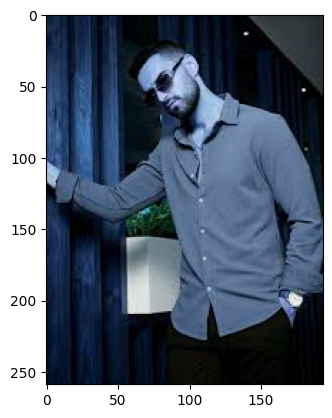

In [21]:
plt.imshow(image)

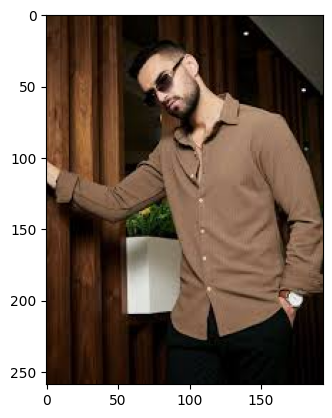

In [22]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
for image_class in os.listdir('dress_classification'):
    for image in os.listdir(os.path.join('dress_classification',image_class)):
        image_path=os.path.join('dress_classification',image_class,image)
        try:
            image=cv2.imread(image_path)
            extension=imghdr.what(image_path)
            if extension not in image_exts:
                print("invalid extension {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("issue with image {}".format(image_path))
                

issue with image dress_classification\dress\.ipynb_checkpoints
issue with image dress_classification\jeans\.ipynb_checkpoints
issue with image dress_classification\shirt\.ipynb_checkpoints


In [24]:
import numpy as np

In [25]:
#building a datapipeline
data=tf.keras.utils.image_dataset_from_directory('dress_classification',image_size=(255,255),batch_size=16)

Found 148 files belonging to 3 classes.


In [26]:
'''This TensorFlow utility automatically creates a dataset from images stored in folders.
The structure of your folder should be like this:
dress_classification/
│
├── casual/
│   ├── img1.jpg
│   ├── img2.jpg
│
├── formal/
│   ├── img3.jpg
│   ├── img4.jpg
│
└── traditional/
    ├── img5.jpg
    ├── img6.jpg
'''

'This TensorFlow utility automatically creates a dataset from images stored in folders.\nThe structure of your folder should be like this:\ndress_classification/\n│\n├── casual/\n│   ├── img1.jpg\n│   ├── img2.jpg\n│\n├── formal/\n│   ├── img3.jpg\n│   ├── img4.jpg\n│\n└── traditional/\n    ├── img5.jpg\n    ├── img6.jpg\n'

In [27]:
'''It converts the TensorFlow dataset into a Python iterator that yields batches as NumPy arrays.\
Hey TensorFlow, give me a tool that lets me take out those small handfuls(batches) to train your model one by one — 
and please give them to me as normal NumPy arrays,not TensorFlow tensors.'''

'It converts the TensorFlow dataset into a Python iterator that yields batches as NumPy arrays.Hey TensorFlow, give me a tool that lets me take out those small handfuls(batches) to train your model one by one — \nand please give them to me as normal NumPy arrays,not TensorFlow tensors.'

In [28]:
#access data from generator
data_it=data.as_numpy_iterator()

In [29]:
batch=data_it.next()
#access data itself

In [30]:
'''Each time you call .next(), you get a next small batch (like 32 images and their labels) as NumPy arrays'''

'Each time you call .next(), you get a next small batch (like 32 images and their labels) as NumPy arrays'

In [31]:
batch[0].shape

(16, 255, 255, 3)

In [32]:
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0])

In [33]:
"""class 1=jeans
class 0=dress
class 2=shirt"""

'class 1=jeans\nclass 0=dress\nclass 2=shirt'

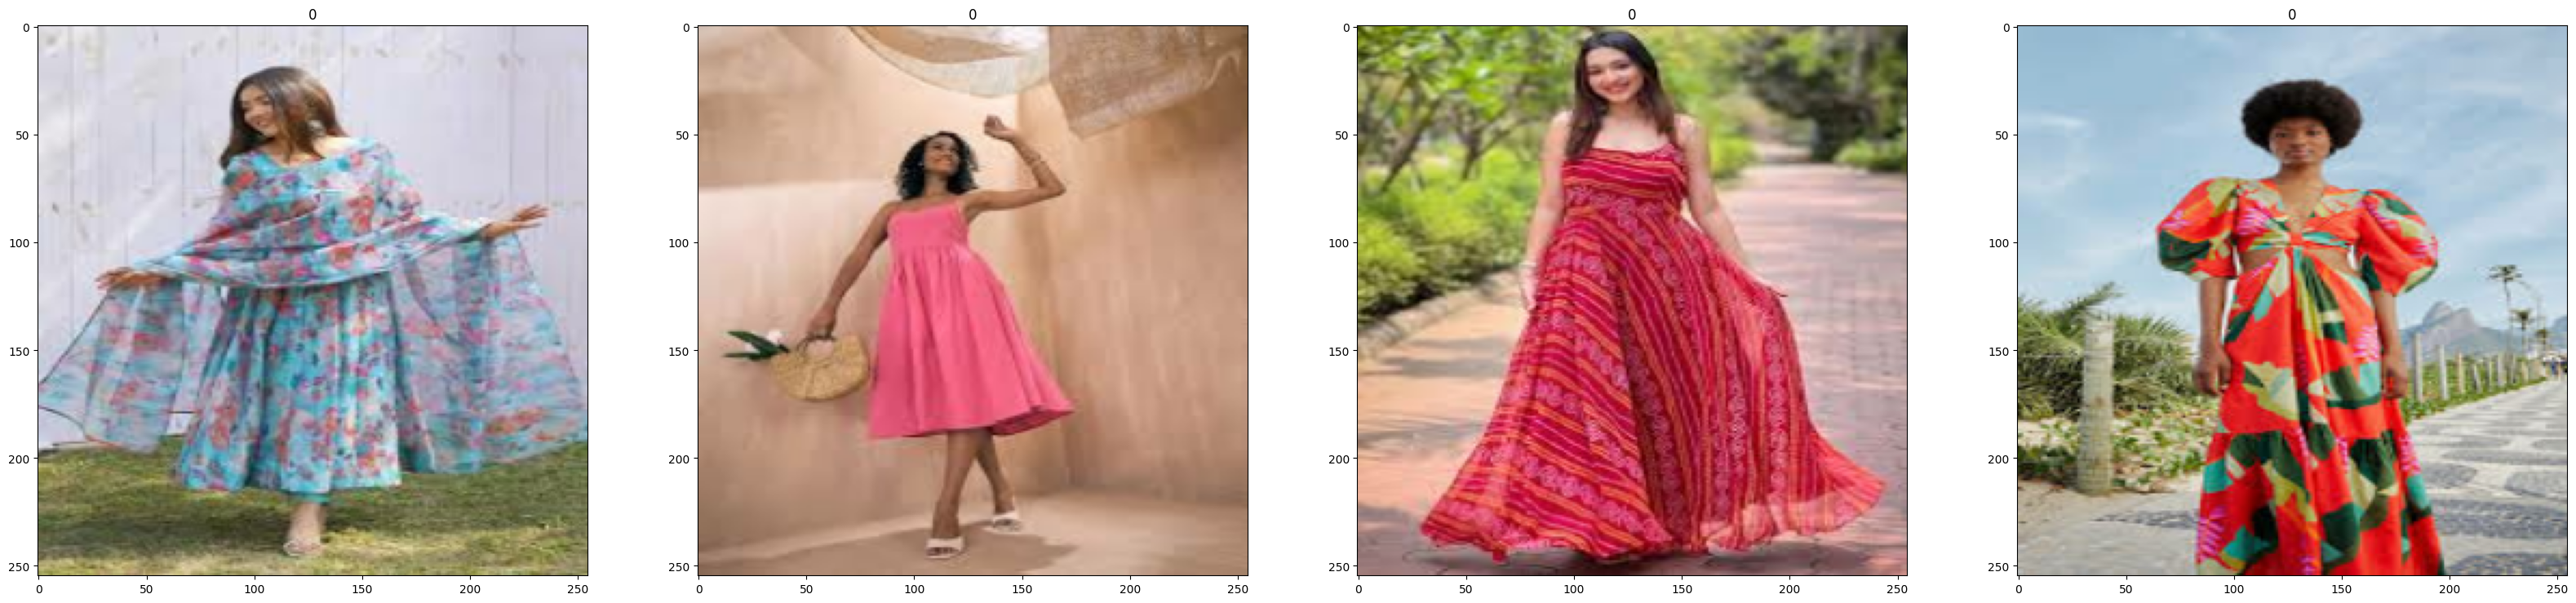

In [34]:
'''“Make one big canvas (fig), and divide it into 4 small boxes (ax) side by side — where each box can hold one image or one plot.
You can use each ax[i] to show one image, one graph, or one part of your visualization.”'''
image,ax=plt.subplots(ncols=4,figsize=(40,40))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [35]:
"""opencv=RGB
    tensorflow=BGR"""

'opencv=RGB\n    tensorflow=BGR'

PREPROCESSING

In [36]:
data=data.map(lambda x,y:(x/255,y))
iterator=data.as_numpy_iterator()
batch=iterator.next()
batch[0].min()

0.0

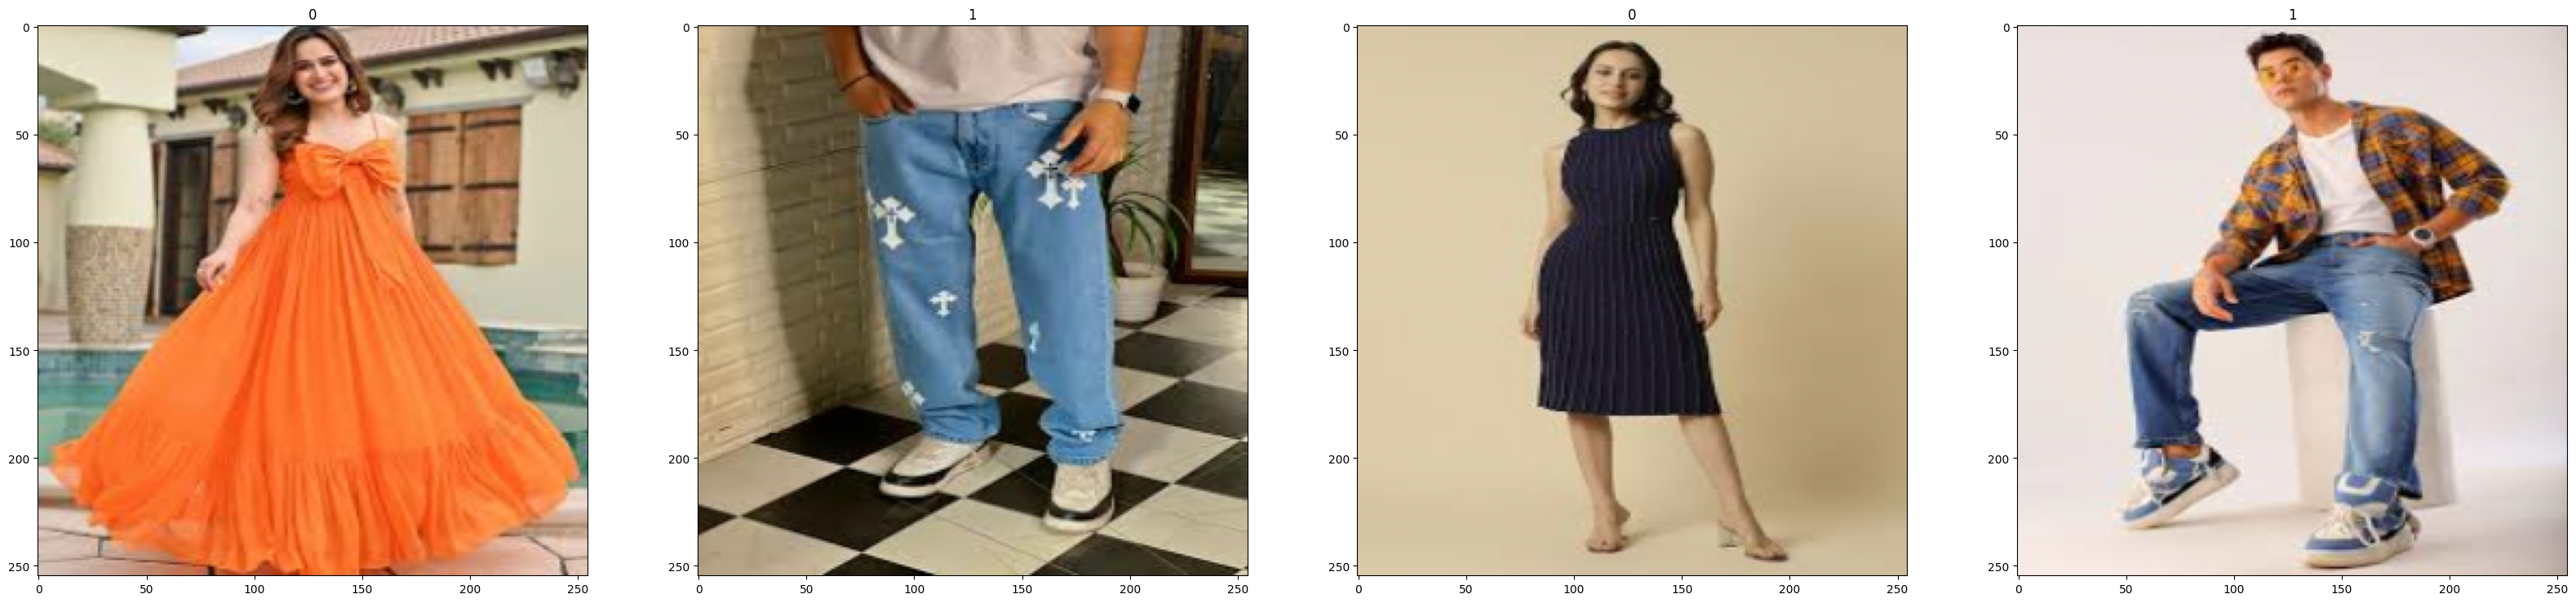

In [37]:
image,ax=plt.subplots(ncols=4,figsize=(40,40))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

SPLIT DATA

In [38]:
len(data) #number of batches

10

In [39]:
train_size=int(len(data)*0.7)
valid_size=int(len(data)*0.3)
test_size=int(len(data)*0.2)

In [40]:
test_size

2

In [41]:
train=data.take(train_size)
valid=data.skip(train_size).take(valid_size)
test=data.skip(valid_size+train_size).take(test_size)

MODEL

In [42]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3,activation='softmax')
])

C:\Users\Bishnu\OneDrive\Documents\envs\neew\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
opt=tf.keras.optimizers.Adam(learning_rate=1e-4)

In [44]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=opt,metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      29,491,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,862,531 (113.92 MB)

 Trainable params: 29,862,531 (113.92 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
hist=model.fit(train,epochs=20,validation_data=valid)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4129 - loss: 1.0509 - val_accuracy: 0.6111 - val_loss: 0.9515
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6100 - loss: 0.9373 - val_accuracy: 0.8333 - val_loss: 0.7232
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6855 - loss: 0.7487 - val_accuracy: 0.4444 - val_loss: 1.0628
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6910 - loss: 0.7935 - val_accuracy: 0.8333 - val_loss: 0.5627
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7885 - loss: 0.6428 - val_accuracy: 0.8333 - val_loss: 0.5339
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7789 - loss: 0.7225 - val_accuracy: 0.8056 - val_loss: 0.5063
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8331 - loss: 0.4844 - val_accuracy: 0.9167 - val_loss: 0.4621
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8682 - loss: 0.4640 - val_accuracy: 0.9167 - val_loss: 0.2835
Epoch 9/20
7/7 

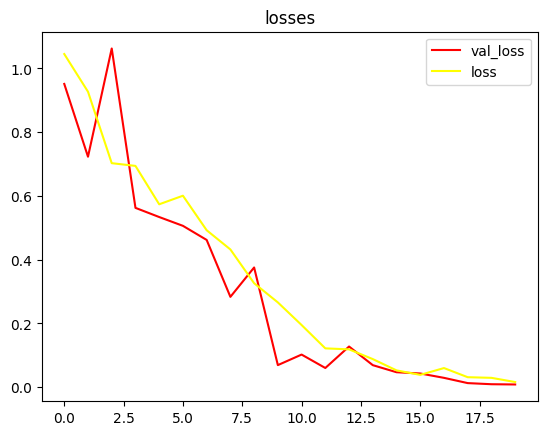

In [47]:
fig=plt.figure()
plt.plot(hist.history['val_loss'],color='red',label="val_loss")
plt.plot(hist.history['loss'],color='yellow',label="loss")
plt.title("losses")
plt.legend()
plt.show()

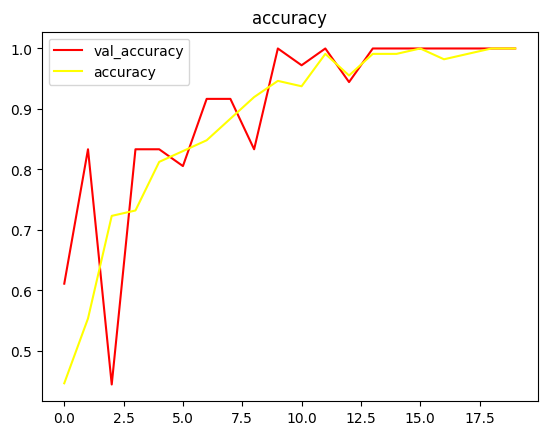

In [48]:
fig=plt.figure()
plt.plot(hist.history['val_accuracy'],color='red',label="val_accuracy")
plt.plot(hist.history['accuracy'],color='yellow',label="accuracy")
plt.title("accuracy")
plt.legend()
plt.show()

In [49]:
'''from tensorflow.keras.metrics import Precision ,Recall ,Accuracy
pre=Precision()
re=Recall()
ac=Accuracy()
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    print(f"Shape of true labels (y): {y.shape}")
    print(f"Shape of predictions (yhat): {yhat.shape}")
    
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    ac.update_state(y,yhat)'''

'from tensorflow.keras.metrics import Precision ,Recall ,Accuracy\npre=Precision()\nre=Recall()\nac=Accuracy()\nfor batch in test.as_numpy_iterator():\n    X,y=batch\n    yhat=model.predict(X)\n    print(f"Shape of true labels (y): {y.shape}")\n    print(f"Shape of predictions (yhat): {yhat.shape}")\n    \n    pre.update_state(y,yhat)\n    re.update_state(y,yhat)\n    ac.update_state(y,yhat)'

In [50]:
#print(f'precision{pre.result().numpy()},recall{re.result().numpy()},accuracy{ac.result().numpy()}')

test model

In [51]:
imagei=cv2.imread('test_shirt.jpg')

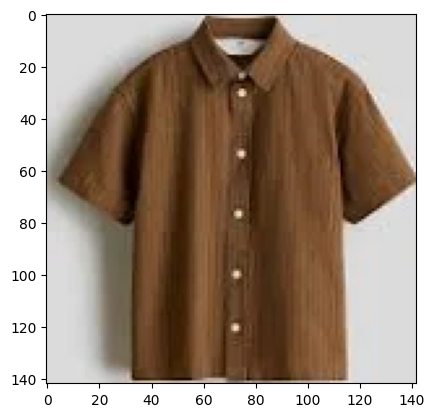

In [52]:
plt.imshow((cv2.cvtColor(imagei,cv2.COLOR_BGR2RGB)))
plt.show()

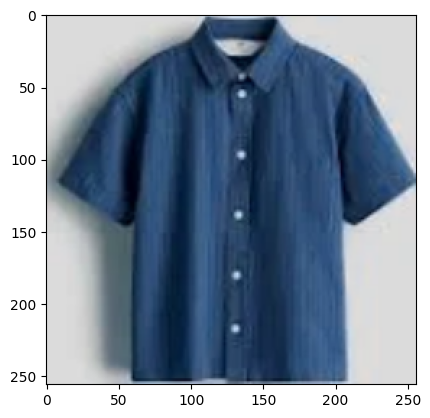

In [53]:
resize=tf.image.resize(imagei,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
resize.shape

TensorShape([256, 256, 3])

In [55]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [56]:
resize.shape

TensorShape([256, 256, 3])

In [57]:
y_hat=model.predict(tf.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


In [58]:
y_hat

array([[0.01855678, 0.03739182, 0.9440513 ]], dtype=float32)

In [59]:
names=['dress','jeans','shirt']
index = np.argmax(y_hat)
print(index)
print(f"the shown image is {names[index]}")

2
the shown image is shirt


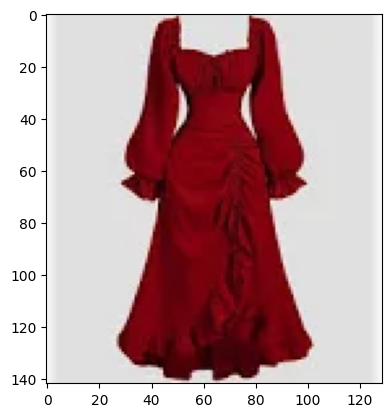

In [60]:
image2=cv2.imread('test_dress.jpg')
plt.imshow((cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)))
plt.show()

In [61]:
resize1=tf.image.resize(image2,(256,256))

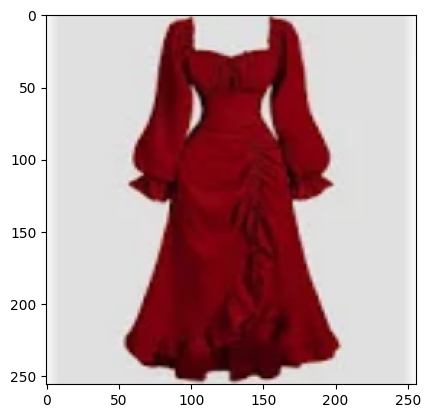

In [62]:
plt.imshow((cv2.cvtColor(resize1.numpy().astype('uint8'),cv2.COLOR_BGR2RGB)))
plt.show()    

In [63]:
y_hat1=model.predict(tf.expand_dims(resize1/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [64]:
y_hat1

array([[0.0057409 , 0.09554119, 0.89871794]], dtype=float32)

In [65]:
#resize1=tf.image.resize(image2,(256,256))
#np.expand_dims(resize1,0).shape
#y_pred=model.predict(tf.expand_dims(resize1/255,0))
names=['dress','jeans','shirt']
index1= np.argmax(y_hat1)
print(index1)
print(f"the shown image is {names[index1]}")

2
the shown image is shirt


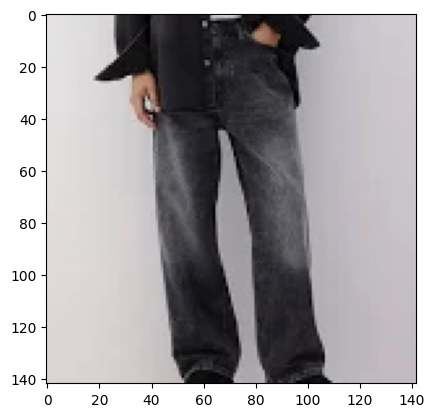

In [66]:
image3=cv2.imread('com_.jpg')
plt.imshow((cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)))
plt.show()

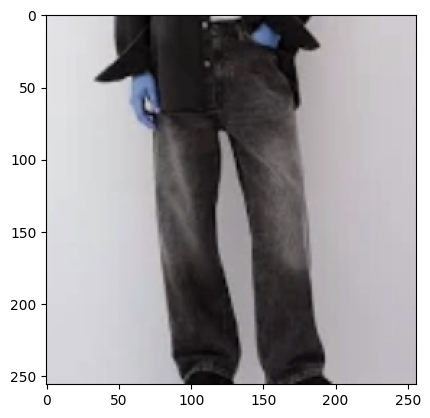

In [67]:
re3=tf.image.resize(image3,(256,256))
plt.imshow(re3.numpy().astype(int))
plt.show()

In [68]:
y_hat2=model.predict(tf.expand_dims(re3/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [69]:
y_hat2

array([[0.01800032, 0.9438491 , 0.03815054]], dtype=float32)

In [70]:
names=['dress','jeans','shirt']
index3= np.argmax(y_hat2)
print(index3)
print(f"the shown image is {names[index3]}")

1
the shown image is jeans


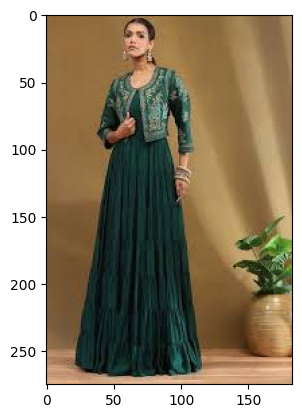

In [71]:
image3=cv2.imread('kk.jpg')
plt.imshow((cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


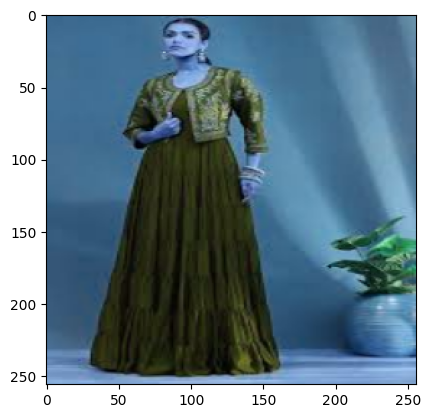

In [72]:
re4=tf.image.resize(image3,(256,256))
plt.imshow(re4.numpy().astype(int))
y_hat2=model.predict(tf.expand_dims(re4/254,0)) 

In [73]:
y_hat2

array([[0.85584235, 0.00131327, 0.14284444]], dtype=float32)

In [74]:
names=['dress','jeans','shirt']
index3= np.argmax(y_hat2)
print(index3)
print(f"the shown image is {names[index3]}")

0
the shown image is dress


save model

In [75]:
from tensorflow.keras.models import load_model

In [76]:
model.save(os.path.join("models","outfit_classification.h5"))

In [77]:
new_model=load_model(os.path.join("models","outfit_classification.h5"))

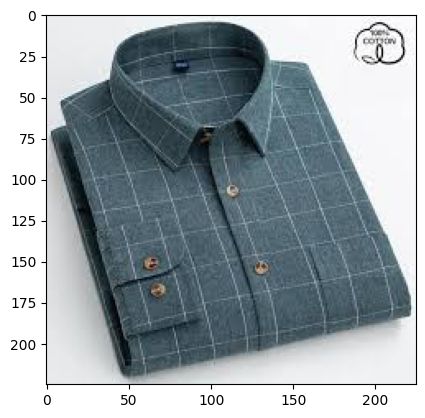

In [78]:
image5=cv2.imread(' Office_shirts.jpg')
plt.imshow((cv2.cvtColor(image5,cv2.COLOR_BGR2RGB)))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


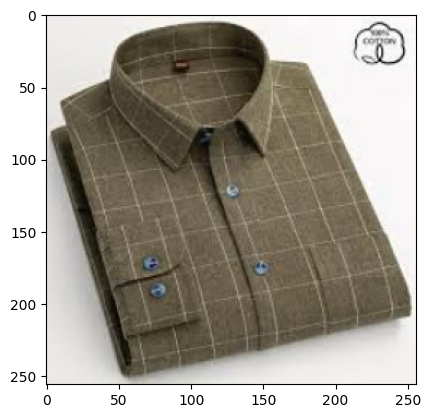

In [79]:
re5=tf.image.resize(image5,(256,256))
plt.imshow(re5.numpy().astype(int))
y_hat4=model.predict(tf.expand_dims(re5/255,0))

In [80]:
y_hat4

array([[0.24286847, 0.00402092, 0.7531106 ]], dtype=float32)

In [81]:
names=['dress','jeans','shirt']
index3= np.argmax(y_hat4)
print(index3)
print(f"the shown image is {names[index3]}")

2
the shown image is shirt


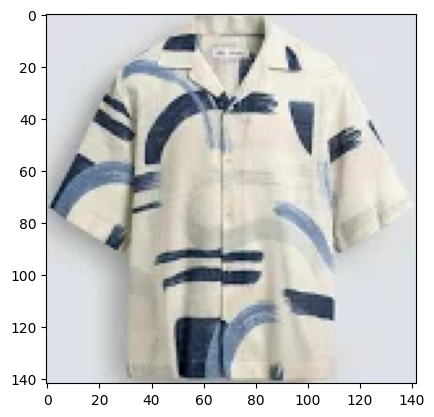

In [82]:
image6=cv2.imread('omg.jpg')
plt.imshow((cv2.cvtColor(image6,cv2.COLOR_BGR2RGB)))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


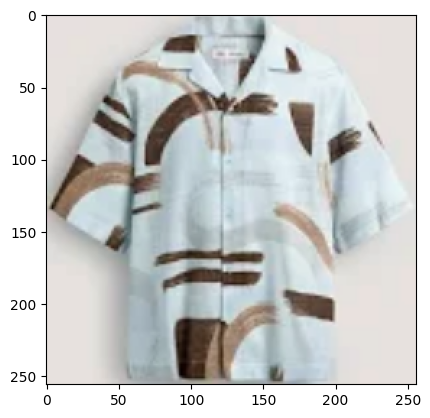

In [83]:
re6=tf.image.resize(image6,(256,256))
plt.imshow(re6.numpy().astype(int))
y_hat6=model.predict(tf.expand_dims(re6/255,0))

In [84]:
names=['dress','jeans','shirt']
index9= np.argmax(y_hat6)
print(index3)
print(f"the shown image is {names[index9]}")

2
the shown image is shirt
